# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.stats import linregress
import numpy as np
import os

# Study data files
mouse_metadata_path = os.path.join('data', 'mouse_metadata.csv')
study_results_path = os.path.join('data', 'study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
unique_mice_count = merged_data["Mouse ID"].nunique() 
print(f"Number of unique mice IDs: {unique_mice_count}")

Number of unique mice IDs: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_timepoints = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)] 
print(f"Duplicate time points:\n{duplicate_timepoints}")

Duplicate time points:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911     

In [4]:
# Optional: Get all the data for the duplicate mouse ID.


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

In [6]:
# Checking the number of mice in the clean DataFrame.
updated_unique_mice = cleaned_data["Mouse ID"].nunique() 
print(f"Updated number of unique mice IDs: {updated_unique_mice}")
cleaned_data.head()

Updated number of unique mice IDs: 249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_data.groupby('Drug Regimen').agg({ 'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem'] })
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
print(summary_stats)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = cleaned_data.groupby('Drug Regimen').agg( Mean=('Tumor Volume (mm3)', 'mean'), Median=('Tumor Volume (mm3)', 'median'), Variance=('Tumor Volume (mm3)', 'var'), Standard_Deviation=('Tumor Volume (mm3)', 'std'), SEM=('Tumor Volume (mm3)', 'sem') )
print(summary_stats_advanced)

drug_regimen_groups = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'] 
group1 = drug_regimen_groups.get_group('Capomulin') 
group2 = drug_regimen_groups.get_group('Infubinol')





                   Mean     Median   Variance  Standard_Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

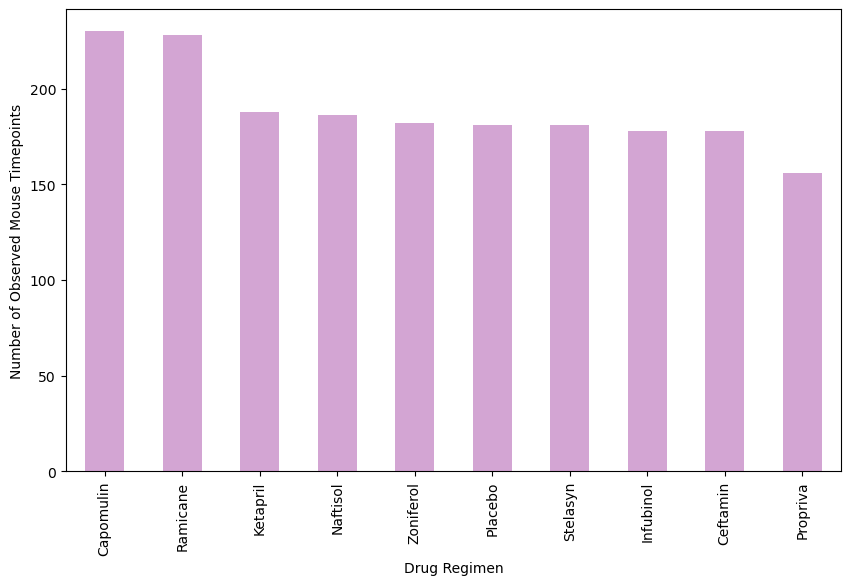

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_counts = cleaned_data['Drug Regimen'].value_counts()
timepoint_counts.plot(kind='bar', figsize=(10, 6), color='#D3A5D3')
plt.xlabel('Drug Regimen') 
plt.ylabel('Number of Observed Mouse Timepoints') 
plt.show()


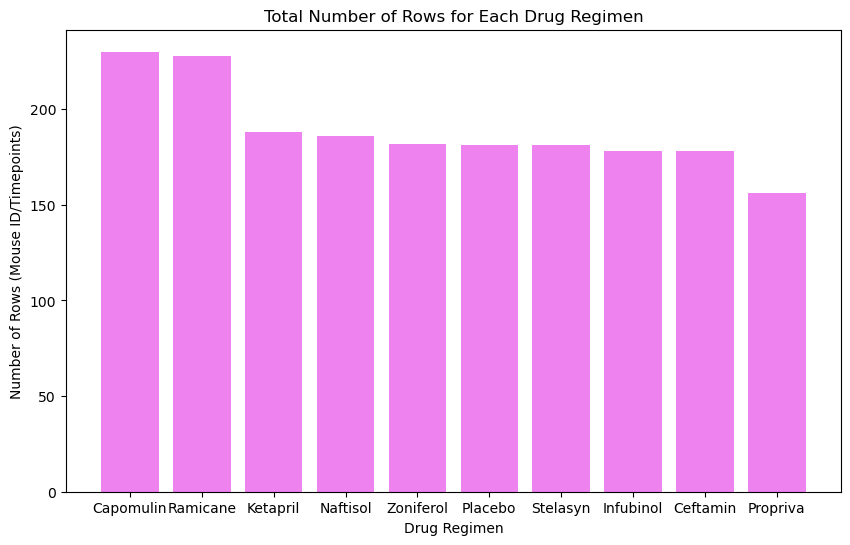

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Import the necessary library
import matplotlib.pyplot as plt

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
timepoint_counts = cleaned_data['Drug Regimen'].value_counts()

# Create the bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(timepoint_counts.index, timepoint_counts.values, color='violet')  # Using light purple color

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')

# Display the plot
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

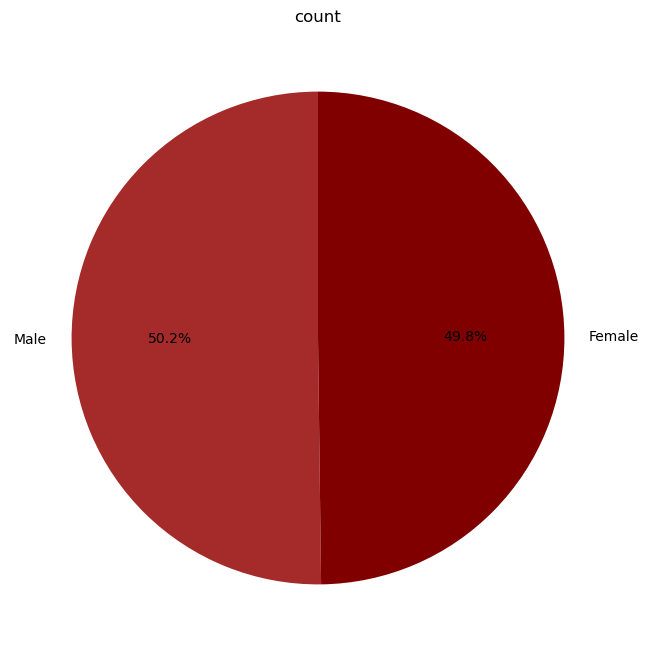

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
import matplotlib.pyplot as plt 
import pandas as pd
# Get the unique mice with their gender
unique_mice = mouse_metadata[['Mouse ID', 'Sex']].drop_duplicates()
gender_distribution = unique_mice['Sex'].value_counts()
# Make the pie chart
plt.figure(figsize=(8, 8)) 
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['brown', 'maroon']) 
plt.title('count') 
plt.ylabel('') # Hide the y-label for a cleaner look plt.show()
plt.show

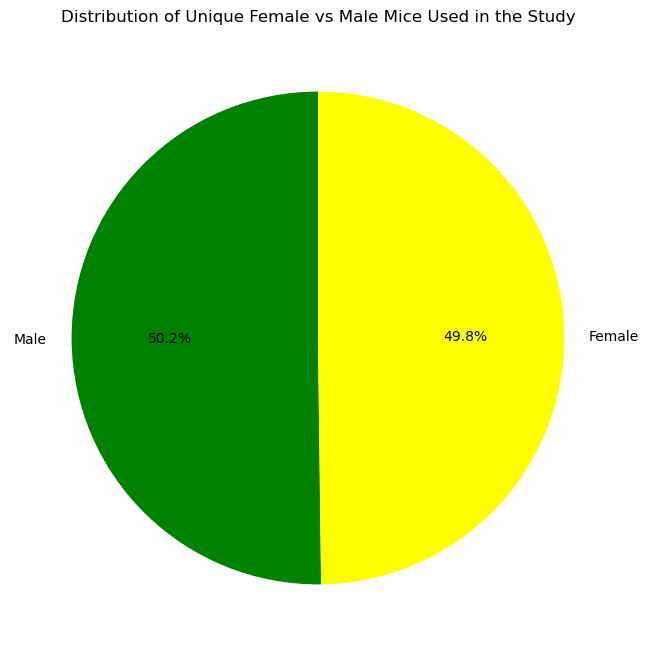

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
import matplotlib.pyplot as plt 
import pandas as pd

mouse_metadata_path = os.path.join('data', 'mouse_metadata.csv')
mouse_metadata = pd.read_csv(mouse_metadata_path)

# Get the unique mice with their gender
unique_mice = mouse_metadata[['Mouse ID', 'Sex']].drop_duplicates()
gender_distribution = unique_mice['Sex'].value_counts()
# Make the pie chart
plt.figure(figsize=(8, 8)) 
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['green', 'yellow']) 
plt.title('Distribution of Unique Female vs Male Mice Used in the Study') 
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
import pandas as pd

mouse_metadata_path = os.path.join('data','mouse_metadata.csv')
study_results_path = os.path.join('data','study_results.csv')

mouse_metadata = pd.read_csv(mouse_metadata_path) 
study_results = pd.read_csv(study_results_path)

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] 
filtered_data = merged_data[merged_data['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoint = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
 tumor_volumes = merged_last_timepoint[merged_last_timepoint['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset
tumor_vol_data.append(tumor_volumes)
quartiles = tumor_volumes.quantile([.25, .5, .75]) 
lowerq = quartiles[0.25] 
upperq = quartiles[0.75] 
iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5 * iqr) 
upper_bound = upperq + (1.5 * iqr) 
outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

print(f"{treatment} treatment potential outliers: {outliers}")

for treatment, data in zip(treatments, tumor_vol_data): 
   print(f"Tumor volumes for {treatment}:\n{data}\n")


Ceftamin treatment potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Tumor volumes for Capomulin:
2     62.999356
10    45.000000
11    56.057749
13    55.742829
23    48.722078
28    47.784682
36    61.849023
39    68.923185
43    67.748662
44    57.918381
46    46.784535
47    59.851956
48    64.299830
56    59.741901
59    61.433892
61    64.192341
74    45.000000
75    52.925348
76    45.000000
84    67.527482
89    45.000000
91    64.634949
92    61.386660
95    68.594745
97    64.729837
Name: Tumor Volume (mm3), dtype: float64



C:\Users\leori\AppData\Local\Temp\ipykernel_6548\276512979.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments)


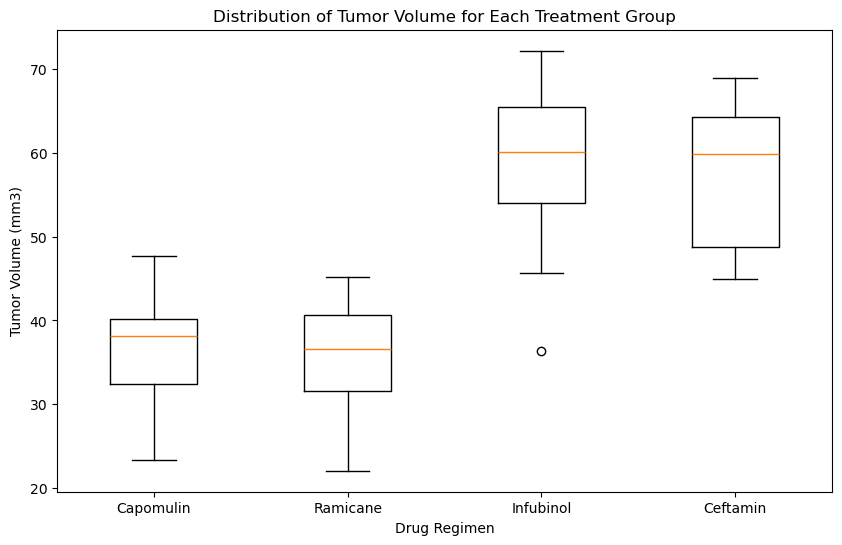

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

import matplotlib.pyplot as plt

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = []

for treatment in treatments:
    tumor_volumes = merged_last_timepoint[merged_last_timepoint['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes)

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)

plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

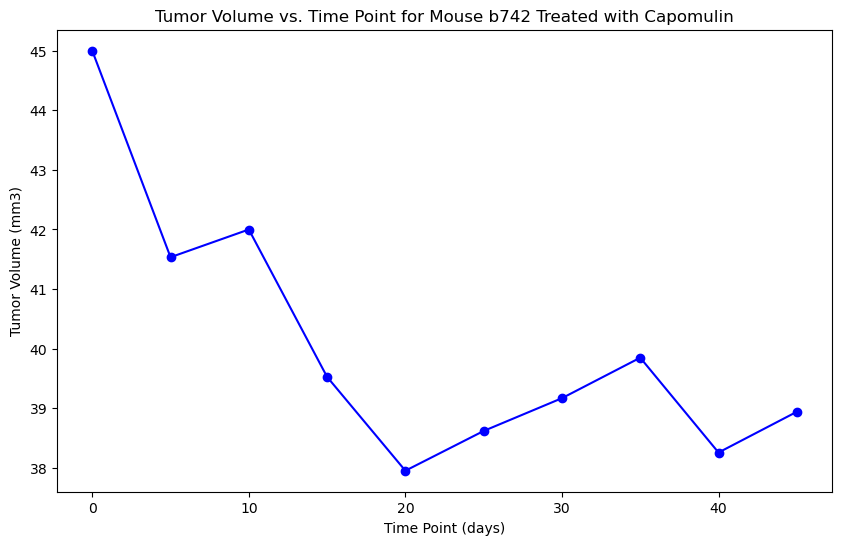

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load Data Files
mouse_metadata_path = os.path.join('data', 'mouse_metadata.csv')

study_results_path = os.path.join('data', 'study_results.csv')

mouse_metadata = pd.read_csv(mouse_metadata_path) 
study_results = pd.read_csv(study_results_path)

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Filter for a single mouse treated with Capomulin
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Select a specific mouse ID (e.g., 'b742')
mouse_id = 'b742'

# Filter for the specific mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Extract the tumor volume and time point data
timepoints = mouse_data['Timepoint']
tumor_volumes = mouse_data['Tumor Volume (mm3)']

# Generate the line plot
plt.figure(figsize=(10, 6))
plt.plot(timepoints, tumor_volumes, marker='o', linestyle='-', color='b')

# Add title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()


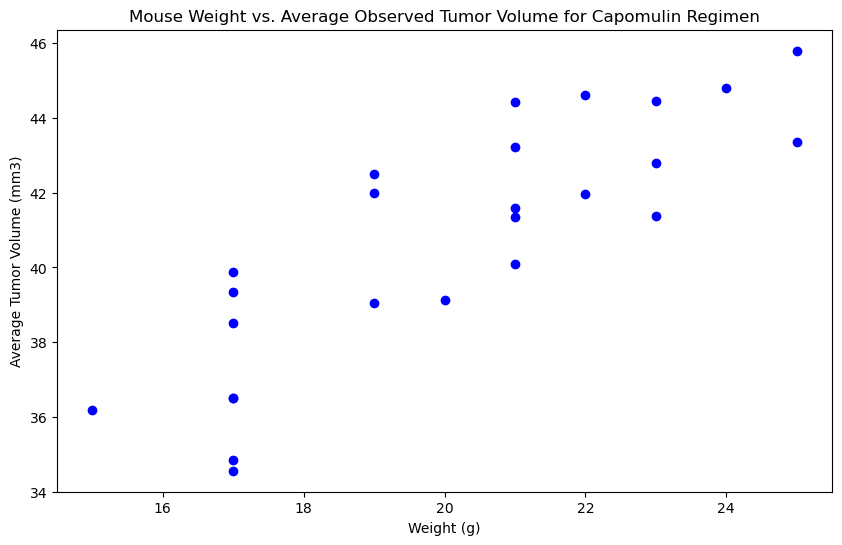

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

import pandas as pd
import matplotlib.pyplot as plt

mouse_metadata_path = os.path.join('data', 'mouse_metadata.csv')
study_results_path = os.path.join('data', 'study_results.csv')

mouse_metadata = pd.read_csv(mouse_metadata_path) 
study_results = pd.read_csv(study_results_path)

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

mouse_weight_volume = pd.merge(average_tumor_volume, mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

mouse_weight = mouse_weight_volume['Weight (g)']
avg_tumor_volume = mouse_weight_volume['Tumor Volume (mm3)']

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color='blue')

plt.title('Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')  # Add grid lines for better visualization
plt.show()



## Correlation and Regression

Correlation coefficient: 0.8419363424694722


Text(0, 0.5, 'Average Tumor Volume(mm3)')

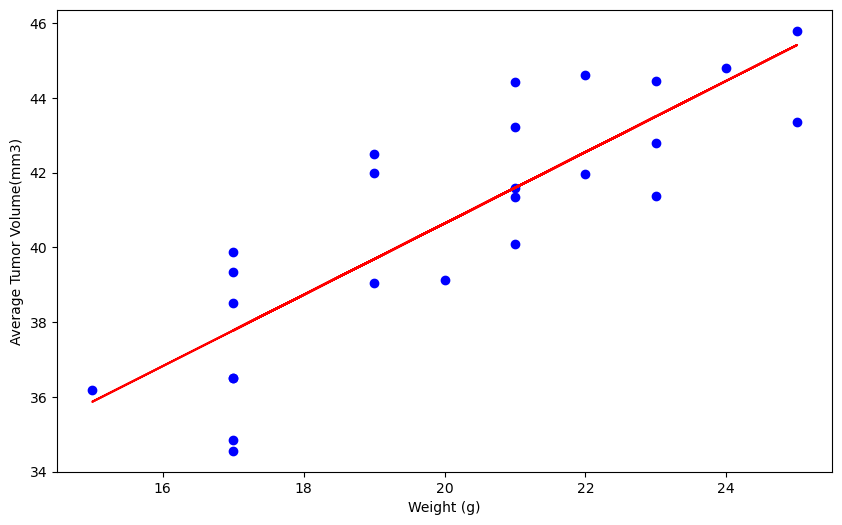

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

mouse_metadata_path = os.path.join('data', 'mouse_metadata.csv')
study_results_path = os.path.join('data', 'study_results.csv')

mouse_metadata = pd.read_csv(mouse_metadata_path) 
study_results = pd.read_csv(study_results_path)

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

mouse_weight_volume = pd.merge(average_tumor_volume, mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

mouse_weight = mouse_weight_volume['Weight (g)']
avg_tumor_volume = mouse_weight_volume['Tumor Volume (mm3)']

correlation = np.corrcoef(mouse_weight, avg_tumor_volume)[0, 1]
print(f'Correlation coefficient: {correlation}')

slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, color='blue', label='Data Points')
plt.plot(mouse_weight, intercept + slope * mouse_weight, 'r', label='Fitted Line')


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')